In [21]:
import numpy as np
import pandas as pd 

In [22]:
df=pd.read_csv('Admission_Predict.csv')

In [23]:
print(df.shape)

(500, 9)


In [24]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [25]:
df.info() #to check missing value 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [26]:
df.duplicated().sum()

0

In [27]:
df.drop(columns=['Serial No.'],inplace=True)  
# inplace means changes done in original df

In [28]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [29]:
x=df.drop(columns=['Chance of Admit '])
y=df['Chance of Admit '].values
print(x.shape,x.ndim,y.shape,y.ndim)

(500, 7) 2 (500,) 1


In [30]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=9)

In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_trf=scaler.fit_transform(X_train)
X_test_trf=scaler.transform(X_test)
print(X_train_trf.shape,X_test_trf.shape,y_train.shape,y_test.shape)
print(X_train_trf.ndim,X_test_trf.ndim,y_train.ndim,y_test.ndim)

(400, 7) (100, 7) (400,) (100,)
2 2 1 1


In [33]:
import tensorflow

from tensorflow import keras
from tensorflow.keras import Sequential 
from tensorflow.keras.layers import Dense

In [34]:
model =Sequential()

In [57]:
model.add(Dense(7,activation='relu',input_dim=7)) 
#to add layers to neural network 
#no of independant features in df = no of neurons in first layer 
model.add(Dense(11,activation='sigmoid'))
model.add(Dense(6,activation='relu'))
model.add(Dense(1,activation='linear'))

In [58]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 56        
                                                                 
 dense_1 (Dense)             (None, 1)                 8         
                                                                 
 dense_2 (Dense)             (None, 7)                 14        
                                                                 
 dense_3 (Dense)             (None, 11)                88        
                                                                 
 dense_4 (Dense)             (None, 1)                 12        
                                                                 
 dense_5 (Dense)             (None, 7)                 14        
                                                                 
 dense_6 (Dense)             (None, 11)                8

In [59]:
model.compile(optimizer='Adam',loss='mean_squared_error')

In [60]:
history=model.fit(X_train_trf,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 28ms/step - loss: 0.2685 - val_loss: 0.2149
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.1673 - val_loss: 0.1292
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0971 - val_loss: 0.0734
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0537 - val_loss: 0.0410
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0310 - val_loss: 0.0252
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0217 - val_loss: 0.0202
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0200 - val_loss: 0.0188
Epoch 8/100
10/10 [==============================] - 0s 9ms/step - loss: 0.0192 - val_loss: 0.0182
Epoch 9/100
10/10 [==============================] - 0s 11ms/step - loss: 0.0187 - val_loss: 0.0178
Epoch 10/100
10/10 [==============================] - 0s 6ms/step - loss: 0.0183 - val_loss: 0.0175
Epoch 1

10/10 [==============================] - 0s 6ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 83/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 84/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 85/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 86/100
10/10 [==============================] - 0s 8ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 87/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0043
Epoch 88/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 89/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0037 - val_loss: 0.0042
Epoch 90/100
10/10 [==============================] - 0s 10ms/step - loss: 0.0036 - val_loss: 0.0043
Epoch 91/100
10/10 [==============================] - 0s 7ms/step - loss: 0.0036 - val_loss: 0.0042
Epoch 92/10

In [51]:
model.layers[0].get_weights()

[array([[-0.7443915 , -0.01845539, -0.49043828, -0.5981311 ,  0.13367279,
         -0.59426296,  0.1473198 ],
        [-0.09161546, -0.47110572,  0.21235694,  0.17107941,  0.7983525 ,
         -0.08446926,  0.2586573 ],
        [ 0.03650828,  0.482447  ,  0.2704083 ,  0.49142268,  0.33001038,
         -0.03654621, -0.13410354],
        [ 0.5567089 , -0.38115692, -0.25427958, -0.16563372,  0.07754613,
         -0.5024592 ,  0.70110124],
        [-0.08021622,  0.04314803, -0.17941976,  0.37204456,  0.2923947 ,
          0.32755738,  0.24698476],
        [ 0.03644732, -0.1276526 , -0.11487726, -0.5693767 ,  0.36018583,
          0.04433879,  1.2306293 ],
        [-0.6385752 , -0.605635  , -0.41682708, -0.07132155,  0.0507859 ,
         -0.20545492,  0.05073189]], dtype=float32),
 array([ 0.14248183,  0.115066  ,  0.16188526,  0.20298071, -0.08608562,
        -0.0141317 , -0.10465836], dtype=float32)]

In [52]:
model.layers[1].get_weights()

[array([[-0.5224599 ],
        [-0.16095254],
        [-0.37479302],
        [-0.4969049 ],
        [ 1.1421043 ],
        [ 0.6936107 ],
        [ 0.381325  ]], dtype=float32),
 array([-0.10350307], dtype=float32)]

In [53]:
model.layers[2].get_weights()

[array([[-0.40103003,  0.61883926, -0.90457195,  0.24601838, -0.72005326,
         -0.26800552, -0.48446748]], dtype=float32),
 array([ 0.09151258, -0.09574611,  0.06156249, -0.03058615, -0.02512904,
         0.06235024, -0.02205742], dtype=float32)]

In [54]:
model.predict(X_test_trf)

4/4 [==============================] - 0s 4ms/step


array([[0.6128713 ],
       [0.6436119 ],
       [0.6246673 ],
       [0.7333922 ],
       [0.6719565 ],
       [0.72897714],
       [0.8969941 ],
       [0.6068116 ],
       [0.4757219 ],
       [0.73140305],
       [0.66763556],
       [0.62076885],
       [0.50513285],
       [0.78948927],
       [0.68115956],
       [0.85137945],
       [0.78874767],
       [0.6191318 ],
       [0.7659996 ],
       [0.6141331 ],
       [0.8514159 ],
       [0.69663125],
       [0.52046263],
       [0.79418045],
       [0.6889552 ],
       [0.707688  ],
       [0.6430204 ],
       [0.9214687 ],
       [0.6177377 ],
       [0.7921488 ],
       [0.7726227 ],
       [0.7442092 ],
       [0.6457953 ],
       [0.65164137],
       [0.6185065 ],
       [0.8949984 ],
       [0.8746362 ],
       [0.84803736],
       [0.5919521 ],
       [0.81793   ],
       [0.8881997 ],
       [0.6403133 ],
       [0.5011244 ],
       [0.91498834],
       [0.5988227 ],
       [0.94178116],
       [0.67573225],
       [0.876

In [61]:
y_pred = model.predict(X_test_trf)

4/4 [==============================] - 0s 3ms/step


In [63]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)
 


0.8049557233501742

In [64]:
print(history.history)

{'loss': [0.2684685289859772, 0.1673421859741211, 0.0970587432384491, 0.05370184779167175, 0.030958985909819603, 0.02172512374818325, 0.019952598959207535, 0.01915811374783516, 0.018701501190662384, 0.018280168995261192, 0.0179757010191679, 0.017636949196457863, 0.017179999500513077, 0.016672620549798012, 0.016060128808021545, 0.015352274291217327, 0.014522713609039783, 0.013595586642622948, 0.012464838102459908, 0.011375591158866882, 0.010385114699602127, 0.00933973677456379, 0.008448606356978416, 0.007725330535322428, 0.007081516087055206, 0.0066179754212498665, 0.006030046846717596, 0.005605282727628946, 0.0052865478210151196, 0.005076405592262745, 0.004907494876533747, 0.004770110826939344, 0.004607231821864843, 0.004505869932472706, 0.004396107047796249, 0.00433651078492403, 0.004252371843904257, 0.00423659011721611, 0.004166691098362207, 0.004090583883225918, 0.004085985478013754, 0.004031070973724127, 0.004022064618766308, 0.004005874041467905, 0.004025622271001339, 0.0039792936

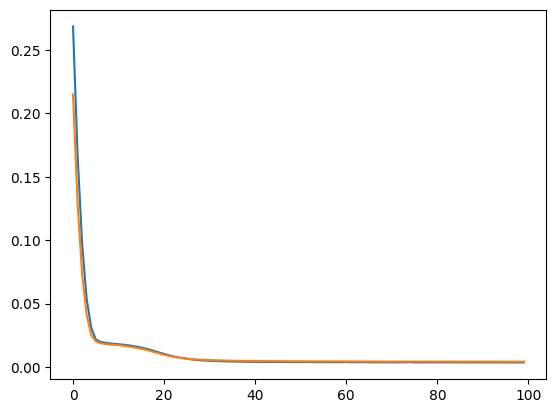

In [66]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])